# Entendimiento inicial de los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

c:\Users\carlo\anaconda3\envs\AppliedDataScience\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data  = pd.read_csv("..\data\hotel_bookings_modified.csv")

C:\Users\carlo\AppData\Local\Temp\ipykernel_19144\2855414219.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  data  = pd.read_csv("..\data\hotel_bookings_modified.csv")


In [3]:
data.shape

(58895, 33)

In [4]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                 float64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [5]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
0,Resort Hotel,0,342,2015.0,July,27,1,0,0,2,...,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,NaN
1,Resort Hotel,0,737,2015.0,July,27,1,0,0,2,...,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,NaN
2,Resort Hotel,0,7,2015.0,July,27,1,0,1,1,...,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,NaN
3,Resort Hotel,0,13,2015.0,July,27,1,0,1,1,...,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,NaN
4,Resort Hotel,0,14,2015.0,July,27,1,0,2,2,...,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03,NaN


In [6]:
data['country'].value_counts()

country
PRT    27559
GBR     7595
ESP     5275
FRA     3037
IRL     2371
       ...  
IMN        1
NIC        1
BEN        1
VGB        1
GAB        1
Name: count, Length: 141, dtype: int64

### Vamos a ver como lidiar con valores vacios dentro del dataframe

In [7]:
data.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                   588
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             478
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              9132
company                           55416


Vamos a eliminar los registros que contienen valores vacios en alguna de las siguientes columnas: 'arrival_date_year', 'country', 'reservation_status' dado que no son una gran cantidad y no tienen sentido dentro del contexto de negocio de demanda de ocupación hotelera

In [8]:
data = data.dropna(subset=['arrival_date_year', 'country', 'reservation_status'])

Se va a ignorar la columna "kids" ya que no se encuentra dentro del diccionario de datos y adicionalmente todos sus valores son nulos (NaN) y se van a llenar los registros vacios de las columnas "company","agent" y "children" con 0.

In [9]:
data.drop(columns=['kids'], inplace=True)
data["company"].fillna(0, inplace=True)
data["agent"].fillna(0, inplace=True)
data['children'].fillna(0, inplace=True)
data['children'] = data['children'].astype(int)

C:\Users\carlo\AppData\Local\Temp\ipykernel_19144\36674355.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["company"].fillna(0, inplace=True)
C:\Users\carlo\AppData\Local\Temp\ipykernel_19144\36674355.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [10]:
data['company'].value_counts()

company
0        54021
223.0      760
281.0      136
154.0      122
405.0       98
         ...  
219.0        1
153.0        1
186          1
38           1
316          1
Name: count, Length: 273, dtype: int64

#### Vamos a transformar algunas columnas para tener una unica que nos indique la fecha de llegada para cada reserva

In [11]:
date_cols = ['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']

def month_to_number(month):
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    return months.index(month) + 1
for col in date_cols:
    if col == 'arrival_date_month':
        data[col] = data[col].apply(month_to_number)

In [12]:
data['arrival_date_year'] = data['arrival_date_year'].astype('Int64', errors='ignore')
data['arrival_date_month'] = pd.to_numeric(data['arrival_date_month'], errors='coerce')
data['arrival_date_day_of_month'] = data['arrival_date_day_of_month'].astype(int)

In [13]:
data['arrival_date_year'].unique()

<IntegerArray>
[2015, 20016, 2016, 2017]
Length: 4, dtype: Int64

In [14]:
data["arrival_date_year"].value_counts().sort_index()

arrival_date_year
2015     14255
2016     29572
2017     12830
20016      602
Name: count, dtype: Int64

Se nota que hay registros que tienen "20016" en la columna "arrival_date_year" pero al ver el total de veces que aparece podria considerarse un typo por lo que se van a reemplazar por "2016"

In [15]:
data['arrival_date_year'] = data['arrival_date_year'].replace(20016, 2016)

In [16]:
data['arrival_date'] = pd.to_datetime(
    data[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1),
    format='%Y-%m-%d'
)

In [17]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0.0,0,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0.0,0,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0.0,0,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,304.0,0,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,240.0,0,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03,2015-07-01


Veamos ahora a distribucion de los datos en cuanto al tipo de hotel que se reserva

In [18]:
print( "Values: ", data['hotel'].value_counts())

print( "Percent: ", data['hotel'].value_counts(normalize=True) * 100)

Values:  hotel
Resort Hotel    38783
City Hotel      18476
Name: count, dtype: int64
Percent:  hotel
Resort Hotel    67.732584
City Hotel      32.267416
Name: proportion, dtype: float64


Vemos que el 68% de las reservas se realizan en Resorts

In [19]:
print( "Values: ", data['is_canceled'].value_counts())

print( "Percent: ", data['is_canceled'].value_counts(normalize=True) * 100)

Values:  is_canceled
0    33535
1    23724
Name: count, dtype: int64
Percent:  is_canceled
0    58.567212
1    41.432788
Name: proportion, dtype: float64


#### De lo anterior se evidencia que la mayoria de las reservas se realizan para Resorts, siendo estas el 68% de los datos y que el 41% de los datos, son registros de reservas canceladas

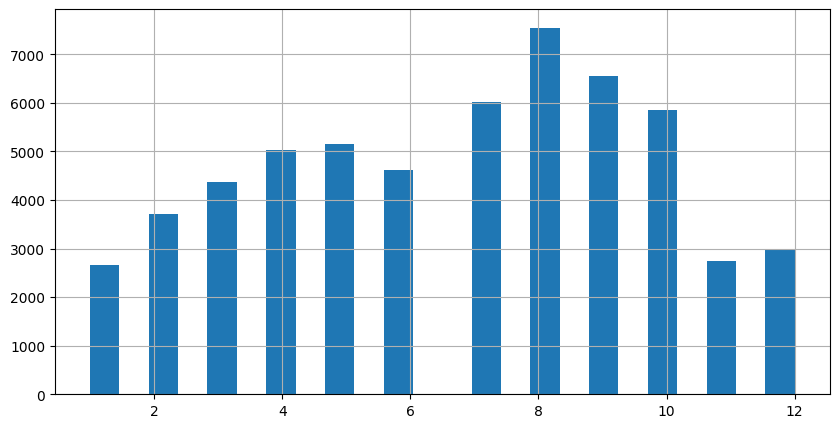

In [20]:
data["arrival_date_month"].hist(bins=24, figsize=(10,5))
plt.show()

Vemos que los meses para los que se realizan mas reservas son Julio, Agosto, Septiembre y Octubre, mientras que los que reciben menos reservas son Noviembre, Diciembre y Enero.

### Ahora vamos a comparar las reservas con respecto al numero de noches que se quedan entre semana contra el numero de noches que se quedan en fines de semana

In [21]:
def days_stayed(df):

    column1_counts = df["stays_in_week_nights"].value_counts().sort_index()
    column2_counts = df["stays_in_weekend_nights"].value_counts().sort_index()

    # Create a DataFrame to hold both columns for comparison
    df_counts = pd.DataFrame({
        'stays_in_week_nights': column1_counts,
        'stays_in_weekend_nights': column2_counts
    })
    return df_counts

In [22]:
stayed = days_stayed(data)

In [23]:
# Computing skewness and kurtosis
print("Skewness:", stayed['stays_in_week_nights'].skew())
print("Kurtosis:", stayed['stays_in_week_nights'].kurtosis())

Skewness: 2.294823920860157
Kurtosis: 4.288580670189706


In [24]:
# Computing skewness and kurtosis
print("Skewness:", stayed['stays_in_weekend_nights'].skew())
print("Kurtosis:", stayed['stays_in_weekend_nights'].kurtosis())

Skewness: 1.8630734167174043
Kurtosis: 2.100283819852897


Al analizar un poco los valores de Skewness y Kurtosis para los días entre semana notamos que al tener una kurtosis mayor a 4 podría decirse que los valores del atributo contienen bastantes outliers, tal y como podemos apreciar en la grafica de abajo, mientras que para los dias de fines de semana no contienen tantos outliers. 
Por otro lado, si revisamos los valores de Skewness vemos que para ambos atributos tenemos una distribución asimetrica de los datos, dado que el valor del estadístico es mayor a 1.

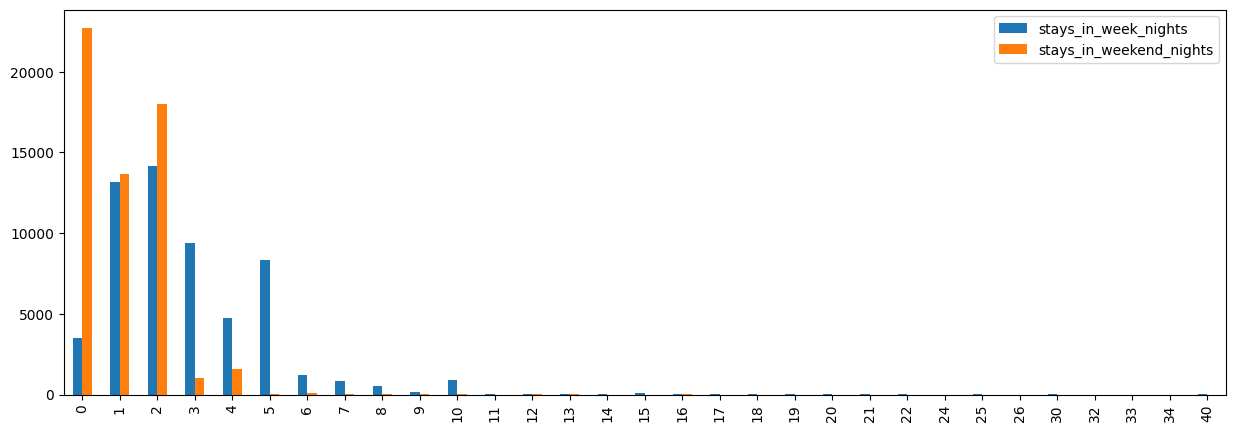

In [25]:
stayed.plot(kind='bar', figsize=(15, 5))
plt.show()

In [26]:
data['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

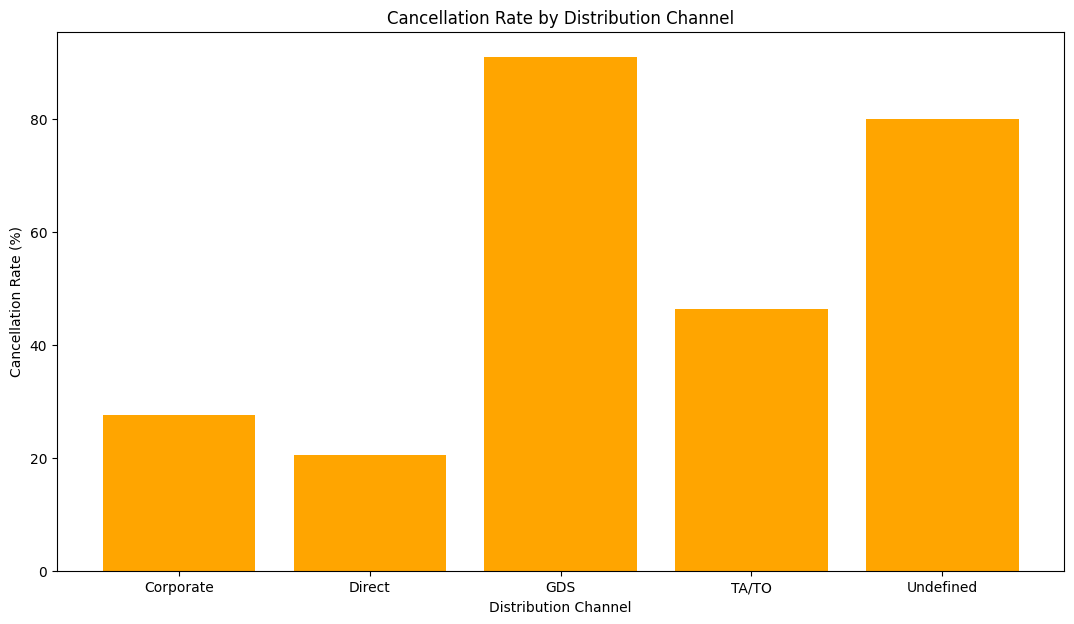

In [27]:
# Calculate cancellation rate by distribution channel
cancellation_rate = data.groupby('distribution_channel')['is_canceled'].mean() * 100

plt.figure(figsize=(13, 7))
plt.bar(cancellation_rate.index, cancellation_rate.values, color='orange')
plt.title('Cancellation Rate by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Cancellation Rate (%)')
plt.show()

## Analisis de los datos correspondientes a reservas canceladas

In [28]:
canceled = data[data['is_canceled'] == 1]
canceled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
8,Resort Hotel,1,85,2015,7,27,1,0,3,2,...,240.0,0,0.0,Transient,82.0,0.0,1.0,Canceled,2015-05-06,2015-07-01
9,Resort Hotel,1,75,2015,7,27,1,0,3,2,...,15.0,0,0.0,Transient,105.5,0.0,0.0,Canceled,2015-04-22,2015-07-01
10,Resort Hotel,1,23,2015,7,27,1,0,4,2,...,240.0,0,0.0,Transient,123.0,0.0,0.0,Canceled,2015-06-23,2015-07-01
27,Resort Hotel,1,60,2015,7,27,1,2,5,2,...,240.0,0,0.0,Transient,107.0,0.0,2.0,Canceled,2015-05-11,2015-07-01
32,Resort Hotel,1,96,2015,7,27,1,2,8,2,...,0.0,0,0.0,Transient,108.3,0.0,2.0,Canceled,2015-05-29,2015-07-01


In [29]:
canceled['hotel'].value_counts()

hotel
City Hotel      12861
Resort Hotel    10863
Name: count, dtype: int64

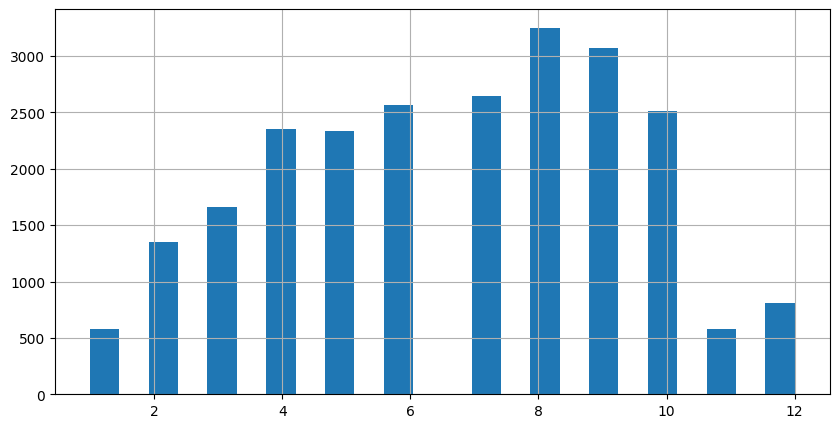

In [30]:
canceled["arrival_date_month"].hist(bins=24, figsize=(10,5))
plt.show()

Podemos notar que los meses que tienen mas reservas canceladas son Julio, Agosto, Septiembre y Octubre.

In [31]:
stayed_canceled = days_stayed(canceled)

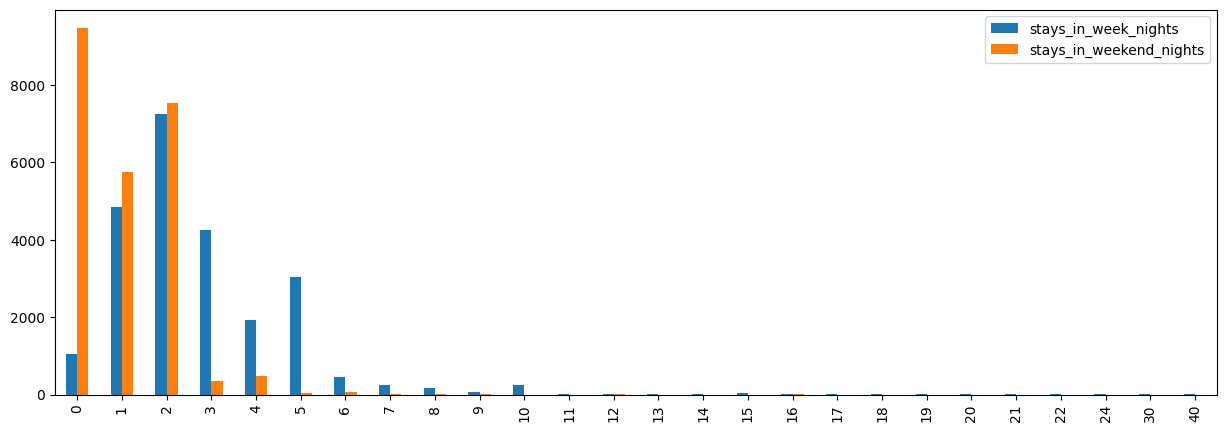

In [32]:
stayed_canceled.plot(kind='bar', figsize=(15, 5))
plt.show()

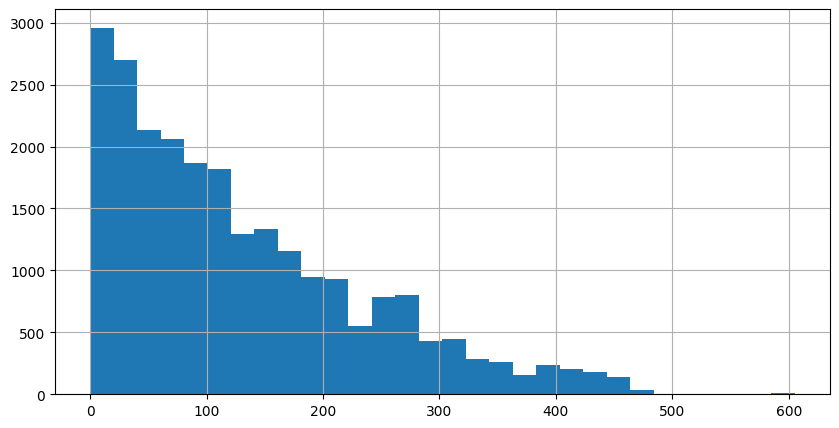

In [33]:
canceled['lead_time'].hist(bins=30, figsize=(10,5))
plt.show()

A partir de los datos de la columna "lead_time" podemos evidenciar que la mayoria de las reservas canceladas son a viajes que podrían considerarse como espontáneos o de último minuto.

In [34]:
canceled["days_in_waiting_list"].describe()

count    23724.000000
mean         4.723360
std         24.408345
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        391.000000
Name: days_in_waiting_list, dtype: float64

<Axes: >

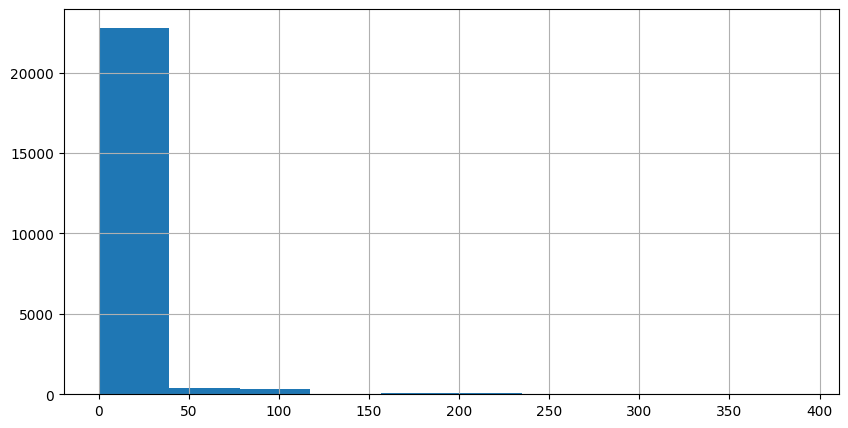

In [35]:
canceled["days_in_waiting_list"].hist(bins=10, figsize=(10,5))

Por otro lado podemos decir que el número de días en el que se esta en lista de espera hasta confirmar al reserva no parece ser demasiado influyente para cancelarla.

Vamos a corroborar lo anterior calculando la correlación lineal entre los atributos mencionados anteriormente (lead_time,days_in_waiting_list ) y el atributo "is_canceled" que es de particular importancia para el contexto de negocio.

In [36]:
data[['lead_time','is_canceled']].corr()

,lead_time,is_canceled
lead_time,1.000000,0.241372
is_canceled,0.241372,1.000000


In [37]:
data[['days_in_waiting_list','is_canceled']].corr()

,days_in_waiting_list,is_canceled
days_in_waiting_list,1.000000,0.045313
is_canceled,0.045313,1.000000


Tal y como se suponía podemos evidenciar que ninguna de las variables tiene mayor impacto sobre si un cliente cancela o no una reserva.

In [38]:
data[['is_repeated_guest','is_canceled']].corr()

,is_repeated_guest,is_canceled
is_repeated_guest,1.000000,-0.125879
is_canceled,-0.125879,1.000000


In [39]:
data['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'FIN', 'MOZ', 'BWA',
       'LUX', 'BRA', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [40]:
top = data['country'].value_counts().head(10).index
print(top)

Index(['PRT', 'GBR', 'ESP', 'FRA', 'IRL', 'DEU', 'ITA', 'CN', 'NLD', 'BEL'], dtype='object', name='country')


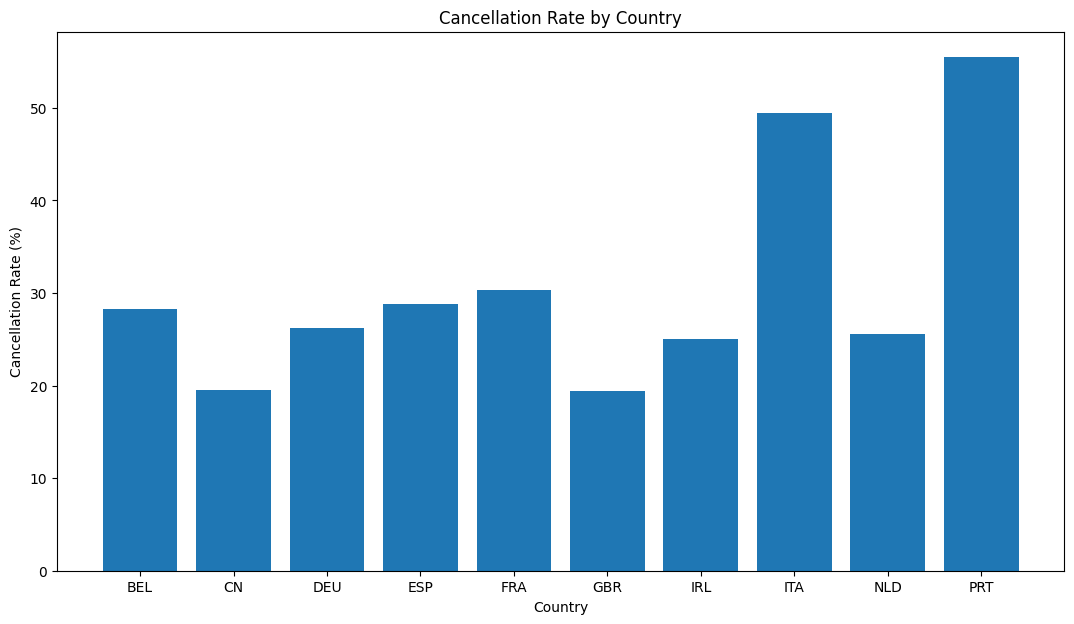

In [41]:
country_cancellation_rate = data[data['country'].isin(top)].groupby('country')['is_canceled'].mean() * 100

plt.figure(figsize=(13, 7))
plt.bar(country_cancellation_rate.index, country_cancellation_rate.values)
plt.title('Cancellation Rate by Country')
plt.xlabel('Country')
plt.ylabel('Cancellation Rate (%)')
plt.show()

De lo anterior vemos que el país puede influir en la cancelación de una reserva, en donde ITA y PRT cuentan con la mayor tasa de cancelación. Finalmente vamos a ver que tanto puede influir la composición del grupo de huespedes en las cancelaciones, por lo que nuevamente vamos a calcular la correlación para los atributos "children" y "adults" con respecto a "is_canceled"

In [42]:
data['children'].unique()

array([ 0,  1,  2, 10,  3])

In [43]:
data[['children','is_canceled']].corr()

,children,is_canceled
children,1.000000,0.037887
is_canceled,0.037887,1.000000


In [44]:
data[['adults','is_canceled']].corr()

,adults,is_canceled
adults,1.000000,0.011307
is_canceled,0.011307,1.000000


Como se puede evidenciar, ninguna de los atributos parece tener impacto significativo por separado sobre el atributo "is_canceled".

#### Finalmente vamos a analizar el impacto del tipo de la habitacion en las cancelaciones 

In [45]:
data['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'B'], dtype=object)

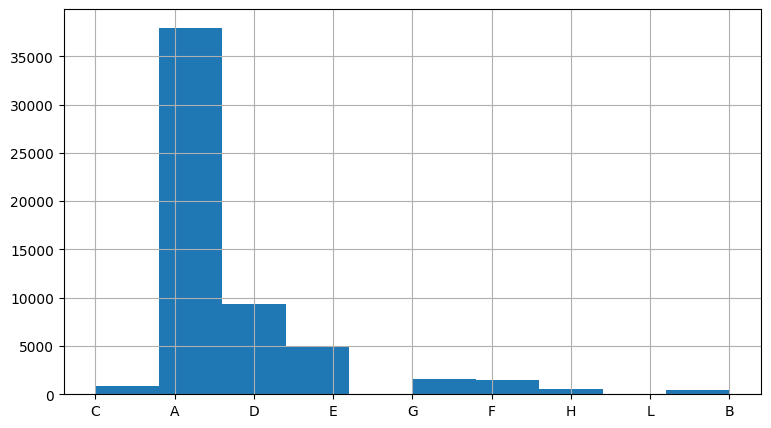

In [46]:
data['reserved_room_type'].hist(bins=10,figsize=(9,5) )
plt.show()

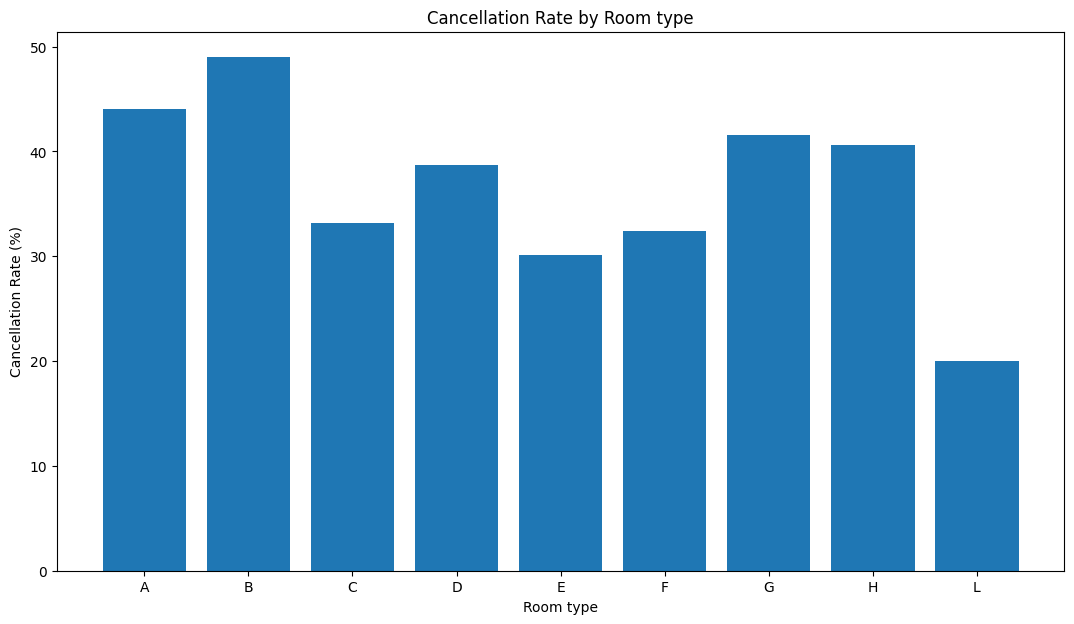

In [47]:
room_cancellation_rate = data.groupby('reserved_room_type')['is_canceled'].mean() * 100

plt.figure(figsize=(13, 7))
plt.bar(room_cancellation_rate.index, room_cancellation_rate.values)
plt.title('Cancellation Rate by Room type')
plt.xlabel('Room type')
plt.ylabel('Cancellation Rate (%)')
plt.show()

De lo anterior notamos que las habitaciones tipo A son las que se reservan más con diferencia, y junto con las tipo B, G y H son las que reciben mayor porcentaje de cancelaciones.

### Perfilado y exportado de los datos procesados

In [48]:
profile = ProfileReport(data)

In [53]:
profile.to_file('report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]


In [50]:
data.to_csv('..\data\hotel_bookings_clean.csv', index=False)
